In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor as cbr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [ ]:
#load dataframe into notebook
df = pd.read_csv('/content/drive/MyDrive/Datathon 2024/Chevron/Train/training.csv')

In [ ]:
df

,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29687,30087,1441088.593,978921.8705,1432758.032,979984.5869,1050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29688,30088,1513299.189,976157.4486,1519890.072,975148.4820,1159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29689,30089,1458652.142,972862.2346,1453129.889,973195.0998,1050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29690,30090,1463417.436,972485.8276,1468807.765,971564.9743,1153,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rows = len(df)
cols = len(df.columns)

In [ ]:
print(df.isnull().sum()/rows)
# columns to exclude: number_of_stages, average_stage_length, average_proppant_per_stage, average_frac_fluid_per_stage

Unnamed: 0                      0.000000
surface_x                       0.000000
surface_y                       0.000000
bh_x                            0.070288
bh_y                            0.070288
standardized_operator_name      0.000000
gross_perforated_length         0.254513
number_of_stages                0.907315
total_proppant                  0.357403
total_fluid                     0.357537
true_vertical_depth             0.050350
ffs_frac_type                   0.508790
proppant_intensity              0.361074
frac_fluid_intensity            0.361916
average_stage_length            0.908258
average_proppant_per_stage      0.909437
average_frac_fluid_per_stage    0.909504
proppant_to_frac_fluid_ratio    0.371683
frac_fluid_to_proppant_ratio    0.371683
bin_lateral_length              0.254513
pad_id                          0.000000
relative_well_position          0.310690
batch_frac_classification       0.310690
well_family_relationship        0.310690
frac_type       

In [ ]:
exclude_cols_1 = ['number_of_stages', 'average_stage_length', 'average_proppant_per_stage', 'average_frac_fluid_per_stage', 'Unnamed: 0']
df1 = df.drop(exclude_cols_1, axis=1)
df1

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,ffs_frac_type,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,76000.0000,NaN,8712.598425,NaN,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,113000.0000,5.610964e+05,8627.952756,NaN,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,286571.4286,1.621424e+06,8801.181102,NaN,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,106878.9286,4.377134e+05,8635.826772,NaN,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,112789.7143,6.229802e+05,8664.370079,NaN,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29687,1441088.593,978921.8705,1432758.032,979984.5869,1050,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29688,1513299.189,976157.4486,1519890.072,975148.4820,1159,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29689,1458652.142,972862.2346,1453129.889,973195.0998,1050,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN
29690,1463417.436,972485.8276,1468807.765,971564.9743,1153,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Primary Frac,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = df1.drop(['OilPeakRate'], axis=1)

y = df1['OilPeakRate'].fillna(df1['OilPeakRate'].mode()[0])

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
cat_df = Xtrain.select_dtypes(include='object')
cat_features = list(cat_df.columns)
cat_features

['ffs_frac_type',
 'relative_well_position',
 'batch_frac_classification',
 'well_family_relationship',
 'frac_type']

In [ ]:
for cat in cat_features:

  Xtrain[cat].fillna(X[cat].mode()[0], inplace=True)
  Xtest[cat] = Xtest[cat].fillna(X[cat].mode()[0])

In [ ]:
ytrain.isnull().sum()

0

In [ ]:
model = cbr(cat_features=cat_features, random_seed=42)
model.fit(Xtrain, ytrain)

Learning rate set to 0.067537
0:	learn: 144.1343678	total: 85.4ms	remaining: 1m 25s
1:	learn: 140.2218752	total: 158ms	remaining: 1m 19s
2:	learn: 136.6282880	total: 245ms	remaining: 1m 21s
3:	learn: 133.3458081	total: 302ms	remaining: 1m 15s
4:	learn: 130.3637239	total: 371ms	remaining: 1m 13s
5:	learn: 127.4308099	total: 432ms	remaining: 1m 11s
6:	learn: 125.0858453	total: 504ms	remaining: 1m 11s
7:	learn: 123.0345329	total: 561ms	remaining: 1m 9s
8:	learn: 121.0846615	total: 630ms	remaining: 1m 9s
9:	learn: 119.1449694	total: 692ms	remaining: 1m 8s
10:	learn: 117.5262290	total: 801ms	remaining: 1m 11s
11:	learn: 115.9511426	total: 854ms	remaining: 1m 10s
12:	learn: 114.6245927	total: 914ms	remaining: 1m 9s
13:	learn: 113.3962986	total: 967ms	remaining: 1m 8s
14:	learn: 112.1587559	total: 1.04s	remaining: 1m 8s
15:	learn: 111.0837083	total: 1.09s	remaining: 1m 6s
16:	learn: 110.0327487	total: 1.16s	remaining: 1m 7s
17:	learn: 109.1155366	total: 1.23s	remaining: 1m 7s
18:	learn: 108.2

In [ ]:
y_hat_test = model.predict(Xtest)
mse_model = mse(ytest, y_hat_test)
print(mse_model)

7319.708011324322


In [ ]:
feat_imp = model.feature_importances_

In [ ]:
dic_imp = dict(zip(Xtrain.columns, feat_imp))

In [ ]:
for i in dic_imp:
  print(i, dic_imp[i])

surface_x 3.4835443529208745
surface_y 4.127112412849042
bh_x 1.861971623454286
bh_y 1.5925853818522788
standardized_operator_name 3.7550458432764793
gross_perforated_length 8.327738335855212
total_proppant 10.07419374746716
total_fluid 5.976607899185186
true_vertical_depth 9.015674656079115
ffs_frac_type 1.3892279086120805
proppant_intensity 12.593535011668472
frac_fluid_intensity 3.9891458223514524
proppant_to_frac_fluid_ratio 1.4102529953762595
frac_fluid_to_proppant_ratio 0.8800332592444315
bin_lateral_length 5.508341530509229
pad_id 1.1955336194926496
relative_well_position 1.0915499016421102
batch_frac_classification 7.16858169415274
well_family_relationship 1.0047607791091029
frac_type 0.31584389755771614
frac_seasoning 3.9181333602930533
horizontal_midpoint_x 2.511092435079121
horizontal_midpoint_y 2.183619227056325
horizontal_toe_x 2.847065705103905
horizontal_toe_y 3.7788085998116285


<ipython-input-19-36ec9abe1f28>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df1.corr())


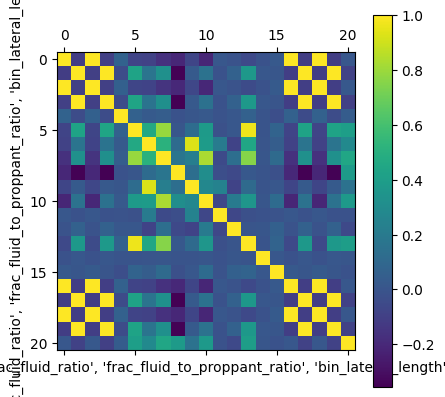

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(df1.corr())
plt.colorbar()
plt.xlabel(list(df1.columns))
plt.ylabel(list(df1.columns))
plt.show()

In [ ]:
df2 = df1[['total_proppant', 'total_fluid','proppant_intensity', 'frac_fluid_intensity']]

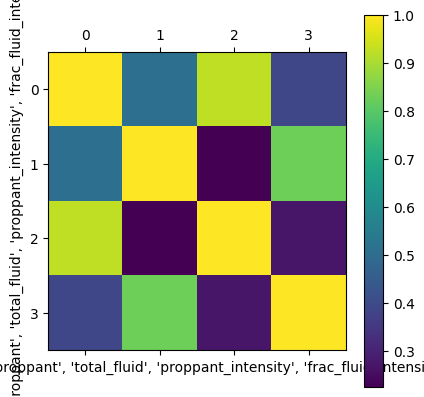

In [ ]:
plt.matshow(df2.corr())
plt.colorbar()
plt.xlabel(list(df2.columns))
plt.ylabel(list(df2.columns))
plt.show()

In [ ]:
df2.corr()

,total_proppant,total_fluid,proppant_intensity,frac_fluid_intensity
total_proppant,1.000000,0.509157,0.925893,0.390890
total_fluid,0.509157,1.000000,0.225352,0.828995
proppant_intensity,0.925893,0.225352,1.000000,0.271109
frac_fluid_intensity,0.390890,0.828995,0.271109,1.000000


In [ ]:
df1.corr()

<ipython-input-23-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,...,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,pad_id,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
surface_x,1.000000,-0.106975,0.999068,-0.100808,0.069228,-0.079806,-0.090476,-0.160275,-0.202223,-0.069765,...,0.011804,-0.010911,-0.057644,-0.011884,0.024606,0.999755,-0.106817,0.999095,-0.106665,0.010566
surface_y,-0.106975,1.000000,-0.099749,0.999947,-0.041139,0.432122,0.166891,0.323551,-0.348102,0.026365,...,-0.013888,0.067826,0.366364,0.012974,0.007719,-0.106357,0.999986,-0.105733,0.999949,-0.088519
bh_x,0.999068,-0.099749,1.000000,-0.099941,0.060304,-0.071579,-0.084540,-0.152992,-0.196994,-0.065518,...,0.011425,-0.005977,-0.047970,-0.014285,0.026621,0.999760,-0.101667,0.999990,-0.101674,0.018243
bh_y,-0.100808,0.999947,-0.099941,1.000000,-0.038496,0.435094,0.161045,0.319626,-0.355258,0.024103,...,-0.013361,0.063057,0.371151,0.011989,0.004703,-0.102141,0.999986,-0.101694,0.999999,-0.098091
standardized_operator_name,0.069228,-0.041139,0.060304,-0.038496,1.000000,0.067794,0.027476,0.044536,-0.013160,0.009264,...,-0.010143,0.012020,0.068058,-0.001183,-0.031801,0.067789,-0.044334,0.066350,-0.042227,0.037613
gross_perforated_length,-0.079806,0.432122,-0.071579,0.435094,0.067794,1.000000,0.463567,0.788762,0.004733,0.123267,...,-0.021030,0.010764,0.964878,-0.001749,0.077829,-0.078712,0.432963,-0.078250,0.432936,0.402726
total_proppant,-0.090476,0.166891,-0.084540,0.161045,0.027476,0.463567,1.000000,0.509157,0.118792,0.925893,...,0.206318,-0.083928,0.444527,0.000786,0.044028,-0.090047,0.166856,-0.089681,0.166795,0.286878
total_fluid,-0.160275,0.323551,-0.152992,0.319626,0.044536,0.788762,0.509157,1.000000,0.170148,0.225352,...,-0.052151,0.132737,0.755501,0.007843,0.114565,-0.159829,0.323955,-0.159454,0.323906,0.447488
true_vertical_depth,-0.202223,-0.348102,-0.196994,-0.355258,-0.013160,0.004733,0.118792,0.170148,1.000000,0.136130,...,-0.028574,-0.058589,0.019588,-0.004135,-0.022255,-0.201239,-0.351283,-0.201757,-0.349529,0.384515
proppant_intensity,-0.069765,0.026365,-0.065518,0.024103,0.009264,0.123267,0.925893,0.225352,0.136130,1.000000,...,0.244262,-0.085254,0.113130,-0.002246,0.013690,-0.069699,0.026411,-0.069546,0.026375,0.157164


In [ ]:
df1.corr()['total_fluid'] > 0.77

<ipython-input-24-8a109364aa2f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['total_fluid'] > 0.77


surface_x                       False
surface_y                       False
bh_x                            False
bh_y                            False
standardized_operator_name      False
gross_perforated_length          True
total_proppant                  False
total_fluid                      True
true_vertical_depth             False
proppant_intensity              False
frac_fluid_intensity             True
proppant_to_frac_fluid_ratio    False
frac_fluid_to_proppant_ratio    False
bin_lateral_length              False
pad_id                          False
frac_seasoning                  False
horizontal_midpoint_x           False
horizontal_midpoint_y           False
horizontal_toe_x                False
horizontal_toe_y                False
OilPeakRate                     False
Name: total_fluid, dtype: bool

In [ ]:
print(df2.loc[df1['total_fluid'].isnull()], df2.loc[df1['frac_fluid_intensity'].isnull()])

       total_proppant  total_fluid  proppant_intensity  frac_fluid_intensity
0          76000.0000          NaN           19.174572                   NaN
16                NaN          NaN                 NaN                   NaN
22        100025.9286          NaN           23.197065                   NaN
23        202714.2857          NaN           46.554637                   NaN
26                NaN          NaN                 NaN                   NaN
...               ...          ...                 ...                   ...
29687             NaN          NaN                 NaN                   NaN
29688             NaN          NaN                 NaN                   NaN
29689             NaN          NaN                 NaN                   NaN
29690             NaN          NaN                 NaN                   NaN
29691             NaN          NaN                 NaN                   NaN

[10616 rows x 4 columns]        total_proppant  total_fluid  proppant_inten

In [ ]:
df3 = df1.loc[df1['OilPeakRate'].isnull()]
row3 = len(df3)

In [ ]:
print(df3.isnull().sum().sort_values()/row3)

surface_x                       0.000000
surface_y                       0.000000
pad_id                          0.000000
frac_type                       0.000000
standardized_operator_name      0.000000
horizontal_toe_y                0.062969
horizontal_toe_x                0.062969
bh_y                            0.063836
bh_x                            0.063836
horizontal_midpoint_y           0.090892
horizontal_midpoint_x           0.090892
true_vertical_depth             0.133834
gross_perforated_length         0.712401
bin_lateral_length              0.712401
total_fluid                     0.883497
total_proppant                  0.887541
batch_frac_classification       0.888215
relative_well_position          0.888215
well_family_relationship        0.888215
proppant_to_frac_fluid_ratio    0.888793
frac_fluid_to_proppant_ratio    0.888793
frac_fluid_intensity            0.891681
proppant_intensity              0.894184
frac_seasoning                  0.972174
ffs_frac_type   

In [ ]:
df4 = df1.loc[df1['OilPeakRate'].isnull() == False]

In [ ]:
row4 = len(df4)
df4

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,ffs_frac_type,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1.383494e+06,7.173292e+05,1.382855e+06,7.127674e+05,1121,3963.582677,76000.00000,NaN,8712.598425,NaN,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1.383031e+06,7.147964e+05,1.382669e+06,7.127984e+05,46.623023
1,1.380344e+06,7.119163e+05,1.379738e+06,7.078606e+05,1022,3179.133858,113000.00000,5.610964e+05,8627.952756,NaN,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1.379965e+06,7.095417e+05,1.379630e+06,7.079077e+05,59.750009
2,1.379916e+06,7.178450e+05,1.379275e+06,7.134720e+05,1304,3810.039370,286571.42860,1.621424e+06,8801.181102,NaN,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1.379357e+06,7.153812e+05,1.378960e+06,7.135304e+05,10.785716
3,1.383567e+06,7.066402e+05,1.382891e+06,7.020684e+05,1022,3723.425197,106878.92860,4.377134e+05,8635.826772,NaN,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1.383100e+06,7.040589e+05,1.382727e+06,7.020985e+05,123.797638
4,1.378963e+06,7.026240e+05,1.379644e+06,7.072049e+05,1022,3811.023622,112789.71430,6.229802e+05,8664.370079,NaN,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1.379546e+06,7.051508e+05,1.379987e+06,7.071237e+05,102.309540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29432,9.477118e+05,1.057502e+06,9.435419e+05,1.059277e+06,1018,4101.377953,95857.14286,5.499711e+05,8877.952756,NaN,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,9.402878e+05,1.060680e+06,9.387423e+05,1.061414e+06,162.307168
29433,9.593475e+05,1.033564e+06,9.637629e+05,1.031391e+06,1018,4512.795276,NaN,NaN,8479.330709,Slickwater Crosslink Hybrid,...,Outer Well,Non-Batch Frac,Sibling Well,Primary Frac,14.0,9.618238e+05,1.032362e+06,9.638230e+05,1.031362e+06,171.071455
29434,9.669162e+05,1.057804e+06,9.709082e+05,1.056045e+06,1164,3660.433071,87857.14286,6.214390e+05,8640.748031,Slickwater Crosslink Hybrid,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,72.0,9.692139e+05,1.056818e+06,9.709078e+05,1.056042e+06,7.171827
29435,9.462629e+05,1.034169e+06,9.525089e+05,1.031066e+06,1018,5930.118110,383857.14290,1.956479e+06,8389.763780,Crosslink Only,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,15.0,9.498084e+05,1.032405e+06,9.525121e+05,1.031066e+06,336.044270


In [ ]:
print(df4.isnull().sum()/row4)

surface_x                       0.000000
surface_y                       0.000000
bh_x                            0.073759
bh_y                            0.073759
standardized_operator_name      0.000000
gross_perforated_length         0.008184
total_proppant                  0.072206
total_fluid                     0.074588
true_vertical_depth             0.005439
ffs_frac_type                   0.258780
proppant_intensity              0.074277
frac_fluid_intensity            0.076919
proppant_to_frac_fluid_ratio    0.093494
frac_fluid_to_proppant_ratio    0.093494
bin_lateral_length              0.008184
pad_id                          0.000000
relative_well_position          0.000000
batch_frac_classification       0.000000
well_family_relationship        0.000000
frac_type                       0.000000
frac_seasoning                  0.250026
horizontal_midpoint_x           0.002952
horizontal_midpoint_y           0.002952
horizontal_toe_x                0.002952
horizontal_toe_y

In [ ]:
df4.corr()['frac_seasoning']

<ipython-input-31-fcbb09859d56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.corr()['frac_seasoning']


surface_x                       0.028512
surface_y                       0.006983
bh_x                            0.030024
bh_y                            0.006421
standardized_operator_name     -0.035329
gross_perforated_length         0.085502
total_proppant                  0.046422
total_fluid                     0.120298
true_vertical_depth            -0.023072
proppant_intensity              0.013611
frac_fluid_intensity            0.121742
proppant_to_frac_fluid_ratio   -0.009006
frac_fluid_to_proppant_ratio    0.061552
bin_lateral_length              0.084235
pad_id                          0.015215
frac_seasoning                  1.000000
horizontal_midpoint_x           0.029017
horizontal_midpoint_y           0.006898
horizontal_toe_x                0.029457
horizontal_toe_y                0.006797
OilPeakRate                    -0.013335
Name: frac_seasoning, dtype: float64

In [ ]:
df5 = df4[['frac_fluid_intensity', 'proppant_intensity', 'total_fluid', '']]

KeyError: "[''] not in index"

In [89]:
df4[cat_features]

,ffs_frac_type,relative_well_position,batch_frac_classification,well_family_relationship,frac_type
0,NaN,Standalone Well,Unknown,Standalone Well,Primary Frac
1,NaN,Outer Well,Unknown,Infill Child Well,Primary Frac
2,NaN,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac
3,NaN,Standalone Well,Unknown,Standalone Well,Primary Frac
4,NaN,Outer Well,Unknown,Infill Child Well,Primary Frac
...,...,...,...,...,...
29432,NaN,Standalone Well,Unknown,Standalone Well,Primary Frac
29433,Slickwater Crosslink Hybrid,Outer Well,Non-Batch Frac,Sibling Well,Primary Frac
29434,Slickwater Crosslink Hybrid,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac
29435,Crosslink Only,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac


In [93]:
df4["frac_fluid_intensity"].min(), df4["frac_fluid_intensity"].max()

(0.132961858, 5901.9238700000005)

In [94]:
df4["frac_fluid_intensity"].mean()

567.8973755932149

In [96]:
import numpy as np
counts, bins = np.histogram(df4["frac_fluid_intensity"].drop([df4['frac_fluid_intensity']])
plt.stairs(counts, bins)

ValueError: autodetected range of [nan, nan] is not finite

In [107]:
df4['frac_fluid_to_proppant_ratio'].min()

0.007830841